In [23]:
 # Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

## Mount file

In [24]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read the CSV from drive

In [25]:


df = pd.read_csv('/content/drive/MyDrive/result.csv')
print(df.head())


   Hours  Result
0      7       1
1      4       0
2      2       0
3      7       1
4      4       0


## Define Features (X) and Target (y)

In [26]:

X = df[['Hours']]   # Independent variable
y = df['Result']      # Dependent variable

## Train-Test Split

In [27]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train model

In [28]:

model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [29]:
# predict
y_pred=model.predict(X_test)

In [30]:
print(y_pred)

[1 0 1]


In [31]:
model.predict([[4]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [32]:
model.predict([[7]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [33]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

 Accuracy: 1.0
 Confusion Matrix:
 [[1 0]
 [0 2]]


## Visualize Sigmoid Curve

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


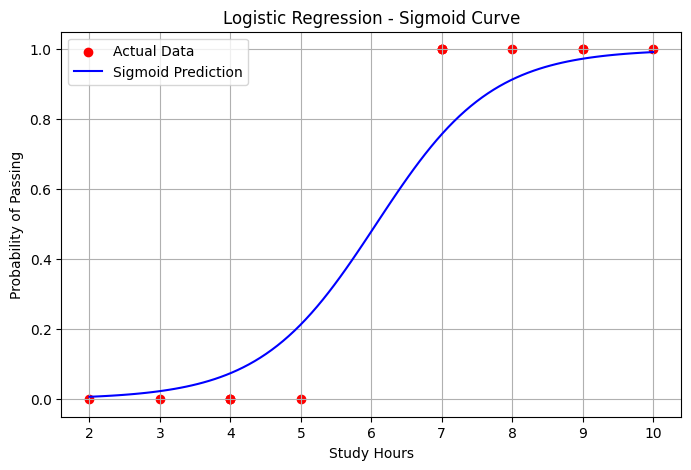

In [34]:
X_full = np.linspace(df['Hours'].min(), df['Hours'].max(), 100).reshape(-1, 1)
y_prob = model.predict_proba(X_full)[:, 1]

plt.figure(figsize=(8, 5))
plt.scatter(df['Hours'], df['Result'], color='red', label='Actual Data')
plt.plot(X_full, y_prob, color='blue', label='Sigmoid Prediction')
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression - Sigmoid Curve')
plt.legend()
plt.grid(True)
plt.show()